In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("./World_Per_Capita_Electricity_Consumption.csv")

In [4]:
data.head()

,Entity,Year,Per capita electricity (kWh)
0,Afghanistan,2000,22.474
1,Afghanistan,2001,27.399
2,Afghanistan,2002,30.397
3,Afghanistan,2003,39.652
4,Afghanistan,2004,36.155


In [5]:
data.shape

(5620, 3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5620 entries, 0 to 5619
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Entity                        5620 non-null   object 
 1   Year                          5620 non-null   int64  
 2   Per capita electricity (kWh)  5620 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 131.8+ KB


In [7]:
data.describe()

,Year,Per capita electricity (kWh)
count,5620.000000,5620.000000
mean,2005.826157,4095.887211
std,9.238193,5403.908499
min,1985.000000,0.000000
25%,2000.000000,646.116250
50%,2007.000000,2555.821500
75%,2013.000000,5561.172750
max,2021.000000,58863.361000


In [8]:
data.isnull().sum()

Entity                          0
Year                            0
Per capita electricity (kWh)    0
dtype: int64

In [9]:
data['Entity'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Europe', 'European Union (27)', 'Falkland Islands',
       'Fiji', 'Finland', 'France',

In [10]:
data['Entity'].value_counts()

Czechia                 37
Estonia                 37
Slovakia                37
France                  37
Ireland                 37
                        ..
Bhutan                  20
Martinique              20
Dominica                20
Yemen                   20
Netherlands Antilles    18
Name: Entity, Length: 213, dtype: int64

In [24]:
len(data['Entity'].unique())

213

In [13]:
Nigeria_electricity_consumption = data[data['Entity']=='Nigeria']

In [14]:
Nigeria_electricity_consumption.head()

,Entity,Year,Per capita electricity (kWh)
3568,Nigeria,2000,115.665
3569,Nigeria,2001,118.379
3570,Nigeria,2002,160.783
3571,Nigeria,2003,146.762
3572,Nigeria,2004,171.718


#### Data Visualization

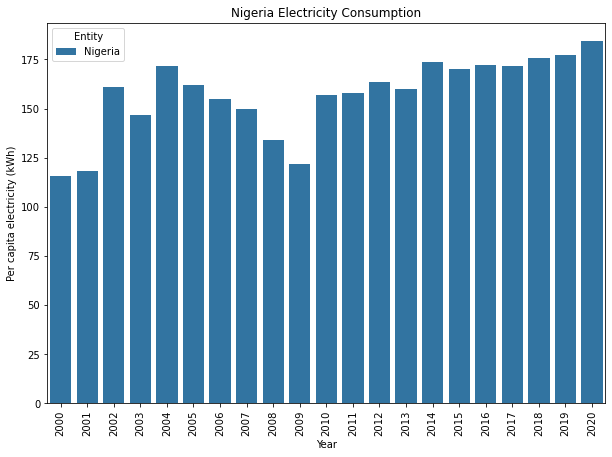

In [15]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'Year',
y = 'Per capita electricity (kWh)',
hue = 'Entity',
data = Nigeria_electricity_consumption)
plt.xticks(rotation = 90)
plt.title("Nigeria Electricity Consumption")
plt.show()


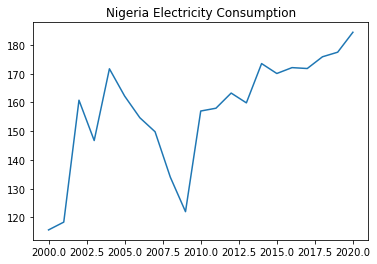

In [25]:
plt.plot(data['Year'][data['Entity']=='Nigeria'],
data['Per capita electricity (kWh)'][data['Entity']=="Nigeria"])
plt.title("Nigeria Electricity Consumption")
plt.show()

In [16]:
Ghana_electricity_consumption = data[data['Entity']=='Ghana']

In [18]:
Ghana_electricity_consumption.head()

,Entity,Year,Per capita electricity (kWh)
1923,Ghana,2000,370.054
1924,Ghana,2001,391.404
1925,Ghana,2002,351.049
1926,Ghana,2003,275.943
1927,Ghana,2004,276.339


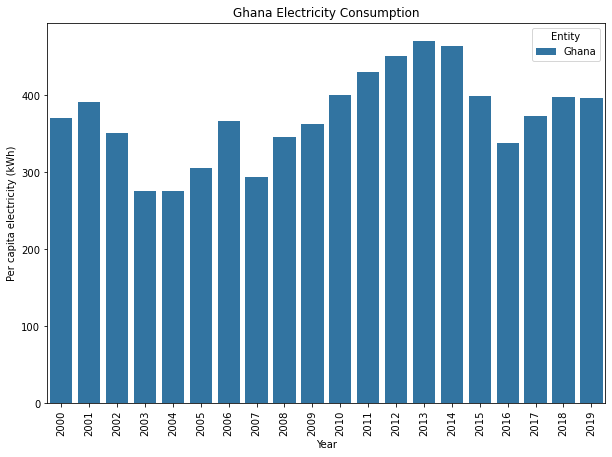

In [19]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'Year',
y = 'Per capita electricity (kWh)',
hue = 'Entity',
data = Ghana_electricity_consumption)
plt.xticks(rotation = 90)
plt.title("Ghana Electricity Consumption")
plt.show()


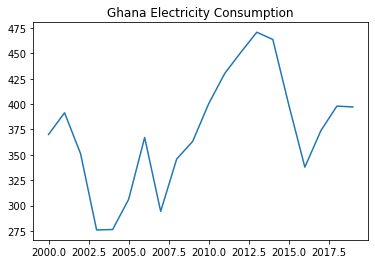

In [26]:
plt.plot(data['Year'][data['Entity']=='Ghana'],
data['Per capita electricity (kWh)'][data['Entity']=="Ghana"])
plt.title("Ghana Electricity Consumption")
plt.show()

In [20]:
US_electricity_consumption = data[data['Entity']=='United States']


In [21]:
US_electricity_consumption.head()


,Entity,Year,Per capita electricity (kWh)
5301,United States,1985,11048.449
5302,United States,1986,11023.556
5303,United States,1987,11312.686
5304,United States,1988,11781.619
5305,United States,1989,12635.657


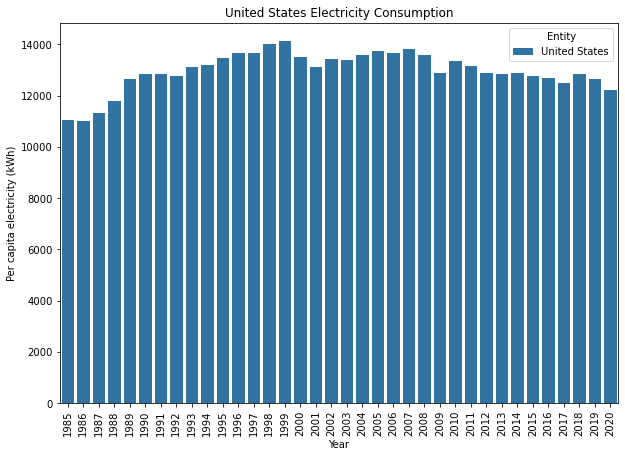

In [22]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'Year',
y = 'Per capita electricity (kWh)',
hue = 'Entity',
data = US_electricity_consumption)
plt.xticks(rotation = 90)
plt.title("United States Electricity Consumption")
plt.show()


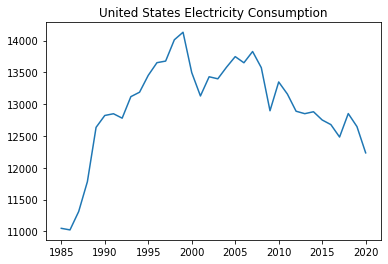

In [28]:
plt.plot(data['Year'][data['Entity']=='United States'],
data['Per capita electricity (kWh)'][data['Entity']=="United States"])
plt.title("United States Electricity Consumption")
plt.show()

#### Splitting the data into Dependent and Independent

In [30]:
X = Nigeria_electricity_consumption.drop(['Per capita electricity (kWh)', 'Entity'], axis = 1)
Y = Nigeria_electricity_consumption['Per capita electricity (kWh)']


In [32]:
X.shape

(21, 1)

In [33]:
Y.shape

(21,)

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

####  Model 

In [38]:
model_Nigeria=LinearRegression()
model_Nigeria.fit(X,Y)

LinearRegression()

In [39]:
print("Coefficient: ",model_Nigeria.coef_)
print("intercept: ",model_Nigeria.intercept_)
pre = model_Nigeria.predict(X)

Coefficient:  [2.28256753]
intercept:  -4430.835645021645


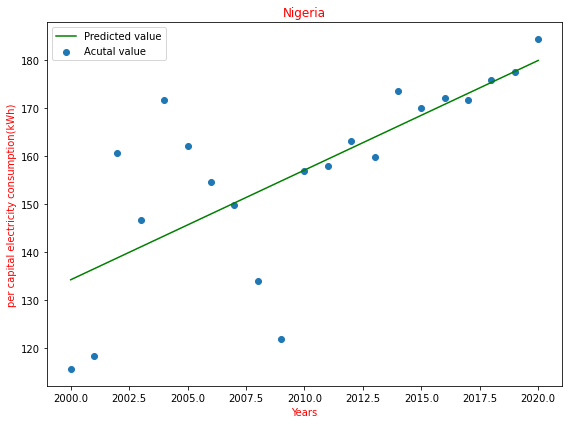

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(X,Y,label='Acutal value')
plt.plot(X,pre,color='g',label='Predicted value')
plt.legend()
plt.title("Nigeria",color='r')
plt.xlabel("Years",color='r')
plt.ylabel("per capital electricity consumption(kWh)",color='r')
plt.tight_layout()
plt.show()

In [63]:
years=[2021,2022,2023,2024,2025]
for i in years:
    print(model_Nigeria.predict([[i]]))


[182.2333381]
[184.51590563]
[186.79847316]
[189.08104069]
[191.36360823]


In [64]:
print("By function: ",mean_squared_error(Y,model_Nigeria.predict(x)))


By function:  182.3555263713254


In [65]:
model_Ghana=LinearRegression()
model_Ghana.fit(X,Y)

LinearRegression()

In [66]:
print("Coefficient: ",model_Ghana.coef_)
print("intercept: ",model_Ghana.intercept_)
pre = model_Ghana.predict(X)

Coefficient:  [2.28256753]
intercept:  -4430.835645021645


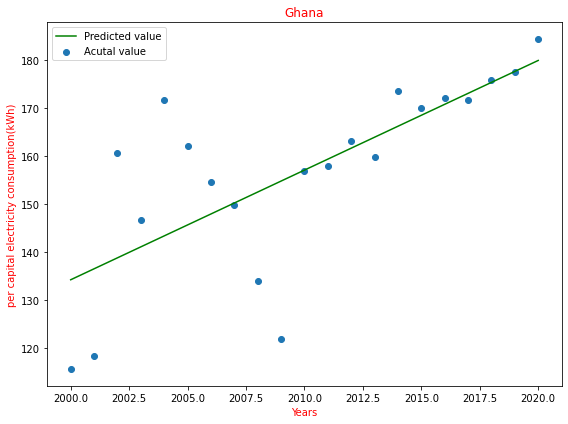

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(X,Y,label='Acutal value')
plt.plot(X,pre,color='g',label='Predicted value')
plt.legend()
plt.title("Ghana",color='r')
plt.xlabel("Years",color='r')
plt.ylabel("per capital electricity consumption(kWh)",color='r')
plt.tight_layout()
plt.show()

In [68]:
years=[2021,2022,2023,2024,2025]
for i in years:
    print(model_Ghana.predict([[i]]))

[182.2333381]
[184.51590563]
[186.79847316]
[189.08104069]
[191.36360823]


In [69]:
print("By function: ",mean_squared_error(Y,model_Ghana.predict(x)))

By function:  182.3555263713254
